In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import warnings
from sklearn.ensemble import StackingClassifier
warnings.filterwarnings('ignore')

In [16]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r"D:\MINI_PROJECT_CLG\my final dataset\thisisit.xlsx")
df.head()

,Unnamed: 0,no interest,sleep,appetite,on edge,overthinking,cannot cope,too much work,stress,anxiety,depression,targets
0,0,0,0,3,1,0,0,1,21,7,4,0
1,1,2,0,2,0,1,2,2,22,7,11,1
2,2,0,0,2,1,1,2,2,19,8,8,0
3,3,3,0,1,0,1,2,1,27,2,8,0
4,4,2,3,1,1,0,3,1,22,2,12,1


In [3]:
df = df.drop(df.iloc[:,:1],axis = 1)
df.head()

,no interest,sleep,appetite,on edge,overthinking,cannot cope,too much work,stress,anxiety,depression,targets
0,0,0,3,1,0,0,1,21,7,4,0
1,2,0,2,0,1,2,2,22,7,11,1
2,0,0,2,1,1,2,2,19,8,8,0
3,3,0,1,0,1,2,1,27,2,8,0
4,2,3,1,1,0,3,1,22,2,12,1


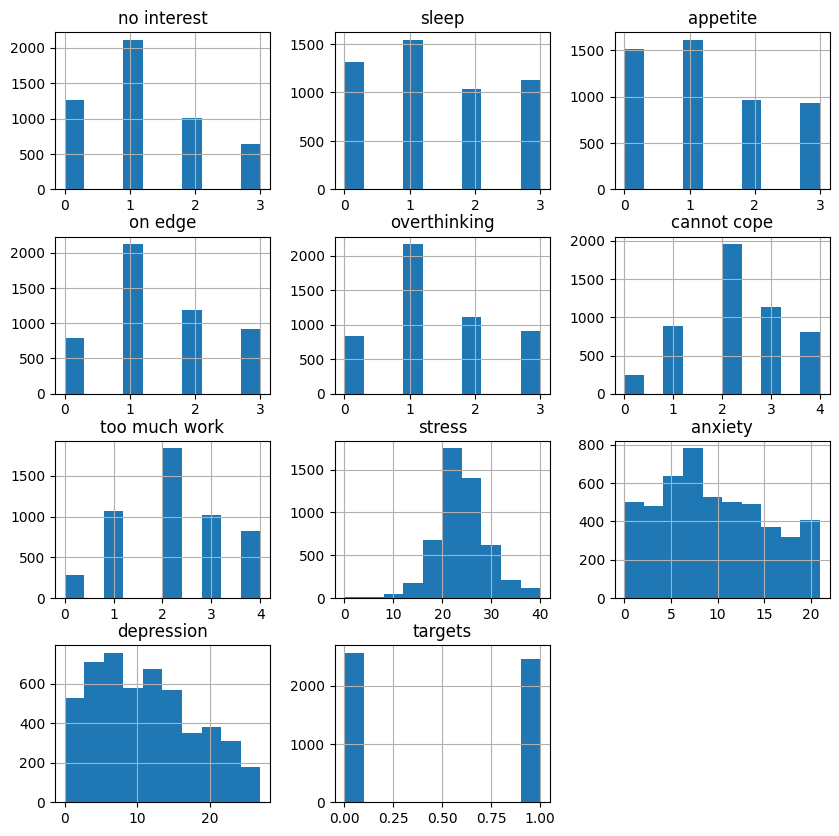

In [4]:
df.hist(bins=10, figsize=(10, 10))
plt.show()

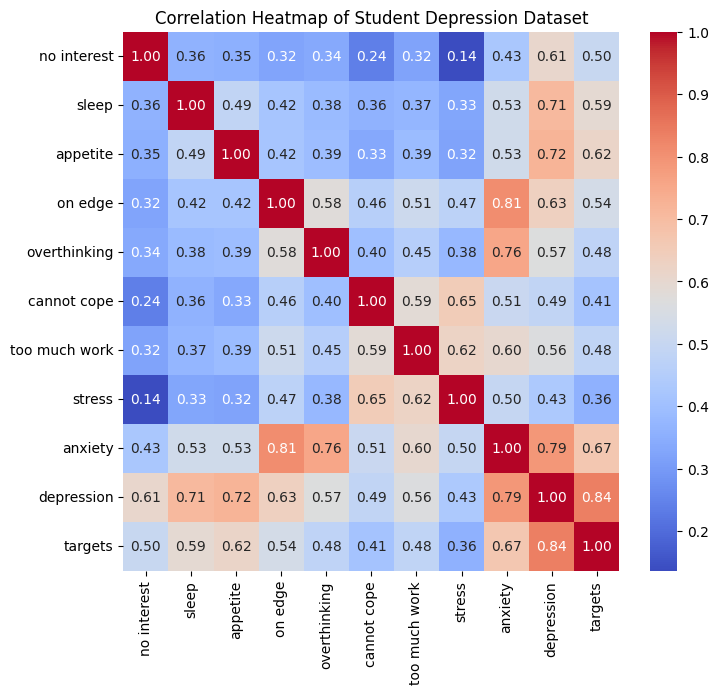

In [5]:
corr = df.corr()

plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of Student Depression Dataset")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   no interest    5020 non-null   int64
 1   sleep          5020 non-null   int64
 2   appetite       5020 non-null   int64
 3   on edge        5020 non-null   int64
 4   overthinking   5020 non-null   int64
 5   cannot cope    5020 non-null   int64
 6   too much work  5020 non-null   int64
 7   stress         5020 non-null   int64
 8   anxiety        5020 non-null   int64
 9   depression     5020 non-null   int64
 10  targets        5020 non-null   int64
dtypes: int64(11)
memory usage: 431.5 KB


In [7]:
inputs = df.iloc[:,:-2]
targets = df['targets']
inputs.columns.values

array(['no interest', 'sleep', 'appetite', 'on edge', 'overthinking',
       'cannot cope', 'too much work', 'stress', 'anxiety'], dtype=object)

In [8]:
scaler = StandardScaler()
inputs_scaled = pd.DataFrame(scaler.fit_transform(inputs),columns = ['no interest', 'sleep', 'appetite', 'on edge', 'overthinking',
       'cannot cope', 'too much work', 'stress', 'anxiety'])
inputs_scaled.head()

,no interest,sleep,appetite,on edge,overthinking,cannot cope,too much work,stress,anxiety
0,-1.256103,-1.265475,1.608663,-0.458581,-1.462700,-2.110948,-1.079689,-0.476656,-0.473267
1,0.830820,-1.265475,0.682787,-1.496487,-0.429092,-0.255251,-0.184407,-0.282623,-0.473267
2,-1.256103,-1.265475,0.682787,-0.458581,-0.429092,-0.255251,-0.184407,-0.864722,-0.295091
3,1.874282,-1.265475,-0.243089,-1.496487,-0.429092,-0.255251,-1.079689,0.687542,-1.364147
4,0.830820,1.458661,-0.243089,-0.458581,-1.462700,0.672598,-1.079689,-0.282623,-1.364147


In [9]:
type(inputs)

pandas.core.frame.DataFrame

In [10]:
skf = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 42)

MODEL TRAINING WITH SCALED DATA

In [11]:
log_reg = LogisticRegression()
for train_index, test_index in skf.split(inputs_scaled, targets):
    x_train,x_test = inputs_scaled.iloc[train_index],inputs_scaled.iloc[test_index]
    y_train,y_test = targets.iloc[train_index],targets.iloc[test_index]
    log_reg.fit(x_train,y_train)
    a = log_reg.score(x_test,y_test)
    y_pred = log_reg.predict(x_test)
    print(f"accuracy = {a}")
print(classification_report(y_test, y_pred))

accuracy = 0.897410358565737
accuracy = 0.8954183266932271
accuracy = 0.896414342629482
accuracy = 0.896414342629482
accuracy = 0.9093625498007968
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       513
           1       0.90      0.91      0.91       491

    accuracy                           0.91      1004
   macro avg       0.91      0.91      0.91      1004
weighted avg       0.91      0.91      0.91      1004



RANDOM FOREST MODEL

In [12]:
rf = RandomForestClassifier(
    n_estimators=500,        
    max_depth= 10,          
    min_samples_split=10,   
    min_samples_leaf=10,    
    max_features="log2",    
    class_weight="balanced",
    random_state=42
)
for train_index, test_index in skf.split(inputs_scaled, targets):
    x_train, x_test = inputs.iloc[train_index], inputs.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]
    
    rf.fit(x_train, y_train)
    a = rf.score(x_test, y_test)   
    print(f"Fold Accuracy = {a:.4f}")
print(classification_report(y_test, y_pred))

Fold Accuracy = 0.8785
Fold Accuracy = 0.8944
Fold Accuracy = 0.9004
Fold Accuracy = 0.8914
Fold Accuracy = 0.9074
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       513
           1       0.90      0.91      0.91       491

    accuracy                           0.91      1004
   macro avg       0.91      0.91      0.91      1004
weighted avg       0.91      0.91      0.91      1004



SVM MODEL

In [13]:
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)

for train_index, test_index in skf.split(inputs_scaled, targets):
    x_train, x_test = inputs_scaled.iloc[train_index], inputs_scaled.iloc[test_index]
    y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]
    
    svm_clf.fit(x_train, y_train)
    acc = svm_clf.score(x_test, y_test)
    y_pred = svm_clf.predict(x_test)
    
    print(f"Fold Accuracy = {acc:.4f}")

print(classification_report(y_test, y_pred))

Fold Accuracy = 0.8984
Fold Accuracy = 0.8944
Fold Accuracy = 0.8944
Fold Accuracy = 0.8914
Fold Accuracy = 0.8974
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       513
           1       0.88      0.91      0.90       491

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004



XTREME GRADIANT MODEL

HYBRID MODEL WITH VOTING

In [14]:
hybrid = VotingClassifier(estimators=[("logreg", log_reg), ("svm", svm_clf),("RandomForestClassifier",rf)],voting="hard")
hybrid.fit(x_train,y_train)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(hybrid,inputs_scaled, targets,cv=skf,scoring=scoring,  return_train_score=False)

print("Mean Accuracy :", round(cv_results['test_accuracy'].mean(),2))
print("Mean Precision:",  round(cv_results['test_precision'].mean(),2))
print("Mean Recall   :",  round(cv_results['test_recall'].mean(),2))
print("Mean F1-score :",  round(cv_results['test_f1'].mean(),2))


Mean Accuracy : 0.9
Mean Precision: 0.9
Mean Recall   : 0.89
Mean F1-score : 0.89


HYBRID MODEL WITH STACKING

In [15]:
final_est = LogisticRegression()
stacking = StackingClassifier(
    estimators=[("logreg", log_reg), ("svm", svm_clf),("randomforest",rf)],
    final_estimator=final_est,
    cv=skf,
    stack_method="predict_proba", 
    n_jobs=-1
)
cv_results = cross_validate(stacking,inputs_scaled, targets,cv=skf,scoring=scoring,  return_train_score=False)

print("Mean Accuracy :", round(cv_results['test_accuracy'].mean(),2))
print("Mean Precision:",  round(cv_results['test_precision'].mean(),2))
print("Mean Recall   :",  round(cv_results['test_recall'].mean(),2))
print("Mean F1-score :",  round(cv_results['test_f1'].mean(),2))

Mean Accuracy : 0.9
Mean Precision: 0.9
Mean Recall   : 0.9
Mean F1-score : 0.9


In [17]:
X_train,X_test,y_train,y_test = train_test_split(inputs_scaled,targets,test_size = 0.2, shuffle = True)

In [19]:
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       514
           1       0.91      0.88      0.89       490

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004



In [20]:
hybrid.fit(X_train,y_train)
y_pred = hybrid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       514
           1       0.90      0.89      0.89       490

    accuracy                           0.90      1004
   macro avg       0.90      0.90      0.90      1004
weighted avg       0.90      0.90      0.90      1004

